In [1]:
import os

input_path = os.environ["DATA"] + "/00_datasets/DFT/stability/OD9_marta_Bryan.json"

all_OD9_shingles_dict_path = os.environ["DATA"] + "/00_datasets/DFT/stability/all_OD9_shingles_dict.json"
all_OD9_shingles_dict_path_own = os.environ["DATA"] + "/00_datasets/DFT/stability/all_OD9_shingles_dict_own.json"

train_set_path = os.environ["DATA"] + "/00_datasets/DFT/stability/train_set.csv"
test_set_path = os.environ["DATA"] + "/00_datasets/DFT/stability/test_set.csv"

output_root = os.environ["DATA"] + "/00_datasets/DFT/stability/"
output_exp_root = os.environ["DATA"] + "/08_XAI/01.01_stability_learning"

n_jobs=8

CV_INTERNAL = 5
CV_EXTERNAL = 10


In [2]:
import json

with open(input_path, "r") as f:
    d = json.load(f)

### Counting the number of positive (DFT error) and negative (passed DFT) results

In [3]:
def count_pass_QM(d):
    
    count_pass_QM = 0
    count_failed_QM = 0
    for elem in d:
        if elem["smiles_is_identical_after_DFT"]:
            count_pass_QM += 1
        else:
            count_failed_QM += 1
    print("failed QM : " + str(count_failed_QM))
    print("passed QM : " + str(count_pass_QM))

In [4]:
count_pass_QM(d)    

failed QM : 294009
passed QM : 100418


### Example input entry

In [5]:
d[0]

{'formula': 'C5H3N3O',
 'n_atoms': 12,
 'id': '000000000',
 'smiles': 'C(#C/C(=N\\[C][NH])/C=O)[NH]',
 'has_smi': True,
 'file': 'OD9_marta_xyz/000000000.xyz',
 'xyz': ['12\n',
  'OD9 000000000\n',
  'C\t1.57563888\t-1.38487149\t0.71619475\n',
  'C\t0.76773167\t-0.43994159\t0.46307502\n',
  'C\t0.04217870\t0.65351776\t0.24988250\n',
  'C\t0.63758145\t1.99374036\t0.58093011\n',
  'O\t0.05475091\t3.06471775\t0.43623241\n',
  'C\t-2.08253204\t-0.11855636\t-0.61221028\n',
  'N\t-1.24756127\t0.71447650\t-0.26315538\n',
  'N\t-2.93073889\t-0.82968866\t-1.09041061\n',
  'N\t2.40353201\t-2.26337226\t0.98257349\n',
  'H\t1.66385769\t1.89528380\t0.97146521\n',
  'H\t-3.76798010\t-1.28916951\t-0.76457884\n',
  'H\t2.18608315\t-3.25824422\t0.82412971\n'],
 'stoechio': [3, 5, 3, 1, 0],
 'homo': -0.234125,
 'lumo': -0.103508,
 'gap': -0.130617,
 'U0': -429.213381896,
 'zpve': 0.073835,
 'has_no_nan': True,
 'orig_smi': 'C1#Cc2coc(n2)NN1',
 'has_orig_smi': True,
 'has_can_smi_before': True,
 'can_smi

## Shingles

### Saving the shingles from the entries in a file

In [6]:
def save_all_shingles(d):
    
    next_id = 0
    shingles_dict = {}
    
    for elem in d:
        for shg in elem["shingles"]:
            if shg not in shingles_dict:
                shingles_dict[shg] = next_id
                next_id += 1
                
    with open(all_OD9_shingles_dict_path, "w") as f:
        json.dump(shingles_dict, f)
    

In [7]:
# save_all_shingles(d)

### Re-extracting the shingles from the SMILES and saving them in another file

In [8]:
import tqdm
from evomol.evaluation_entropy import extract_shingles

def extract_all_shingles_own(d):
    
    next_id = 0
    shingles_dict = {}
    
    for elem in tqdm.tqdm(d):
        mol_smi = elem["can_smi_before"]
        for shg in extract_shingles(mol_smi, 1):
            if shg not in shingles_dict:
                shingles_dict[shg] = next_id
                next_id += 1
                
    with open(all_OD9_shingles_dict_path_own, "w") as f:
        json.dump(shingles_dict, f)          
                

In [9]:
# extract_all_shingles_own(d)

### Comparing shingles from both sets

In [10]:
def load_shingles_list(json_path):
    with open(json_path, "r") as f:
        d = json.load(f)
    return d


In [11]:
shingles_entries = set(load_shingles_list(all_OD9_shingles_dict_path).keys())
shingles_recomputed = set(load_shingles_list(all_OD9_shingles_dict_path_own).keys())

In [12]:
diff = shingles_entries - shingles_recomputed
print(diff)
print(len(diff))

{'c(-c)(=n)o', 'c(=n)([nH])o', 'c(-c)(c)-n', 'c(=n)(-n)n', 'c(-c)(n)-o', 'n(-c)(c)-n', 'c(-n)(n)-n', 'c(c)(=n)-n', 'c(n)([nH])-o', 'c(-c)(-c)n', 'c(-c)(n)-n', 'c(-c)(-c)c', 'c(=n)(n)[nH]', 'C(c)(c)=c', 'c(=n)(o)o', 'c(=c)(-n)O', 'n(-c)(-c)[nH]', 'c(n)(-n)-n', 'c(c)(=n)n', 'c(c)(-n)-o', 'c(-c)(c)=n', 'n(-c)(-c)o', 'c(=n)(n)o', 'c(-n)(n)n', 'c(-c)(=n)n', 'c(c)([nH])-o', 'n(-c)(-c)n', 'n([nH])(-o)o', 'n(-c)(n)-n', 'c(n)(-n)-o', 'c(n)(-o)o', 'c(-c)(=c)O', 'c(=n)(-n)[nH]', 'C(c)(=c)n', 'c(=c)(c)-n', 'c(-n)(n)[nH]', 'n(n)(-o)o', 'c(n)(n)-o', 'c(=c)(-n)[nH]', 'n(-n)(-n)-n', 'c(-c)(c)-o', 'n(-c)(c)-o', 'n(-c)(n)-o', 'c(-c)(=c)n'}
44


In [13]:
diff = shingles_recomputed - shingles_entries
print(diff)
print(len(diff))

{'n(-c)(-c)-c', 'c(#c)-n', 'o(-n)-o', 'n(-c)(-n)-n', 'c(-n)(-n)=O', 'n(-o)-o', 'n(=n)-n', 'c(=c)(O)-o', 'c(=c)(N)-n', 'c(=N)(-o)-o', 'n(C)(-n)-o', 'n(-c)=n', 'c(=n)-o', 'c(=c)(C)-n', 'c(-c)(=N)-n', 'n(-n)(-n)o', 'c(=c)(C)-o', 'c(=N)(-n)-o', 'c(=c)(-o)F', 'c(-c)(=N)-o', 'n(-c)(N)-n', 'c(c)(=n)[nH]', 'n(-n)(-o)o', 'c(=C)(-c)-n', 'n(-c)(C)-o', 'n(-n)(-n)O', 'n(-c)(C)-n', 'c(-c)=n', 'o(-o)-o', 'n(-c)(-c)-o', 'n(N)(-n)-n', 'c(=N)(-n)-n', 'c(-n)=n', 'c(=C)(-c)-c', 'c(C)(=n)-n', 'n(N)(-n)-o', 'n(=n)-o', 'c(#c)-o', 'c(-c)(=c)-n', 'c(=n)-n', 'n(C)(-n)-n', 'n(-c)(-c)-n'}
42


### Train-test separation

In [14]:
from sklearn.model_selection import train_test_split
import csv
import numpy as np

def train_test_separation(d, train_set_path, test_set_path):
    
    smiles_list = [elem["can_smi_before"] for elem in d]
    y = [-1 if elem["smiles_is_identical_after_DFT"] else 1 for elem in d]
    ids = [i for i in range(len(d))]
    
    X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(smiles_list, y, ids, test_size=0.2, 
                                                                           stratify=y, random_state=42)
    
    with open(train_set_path, "w") as f:
        writer = csv.writer(f)
        writer.writerows(np.array([["id"] + list(id_train), ["smiles"] + list(X_train), 
                                   ["target"] + list(y_train)]).T)
        
    with open(test_set_path, "w") as f:
        writer = csv.writer(f)
        writer.writerows(np.array([["id"] + list(id_test), ["smiles"] + list(X_test), 
                                   ["target"] + list(y_test)]).T)

In [15]:
# train_test_separation(d, train_set_path, test_set_path)

## Computing descriptors 

In [16]:
import csv
import numpy as np
from os.path import join

def compute_desc(smiles_path, output_root, dataset_name, desc_builder, desc_name):
    
    with open(smiles_path, "r") as f:
        reader = csv.reader(f)
        reader_values = list(reader)[1:]
        smiles_list = [row[1] for row in reader_values]
        ids_list = [row[0] for row in reader_values]
        
    X, success = desc_builder.fit_transform(smiles_list)
        
    with open(join(output_root, desc_name + "_" + dataset_name + ".csv"), "w") as f:
    
        writer = csv.writer(f)
        for i in range(len(X)):
            
            row = [ids_list[i]] + list(X[i])
            
            writer.writerow(row)
            
    return success
        

In [17]:
from bbomol.descriptor import ShinglesVectDesc, MBTRDesc
import json

with open(all_OD9_shingles_dict_path_own, "r") as f:
    external_shingles_id_dict = json.load(f)
    
shingles_desc_builder = ShinglesVectDesc(vect_size=1000, lvl=1, 
                                         external_desc_id_dict=external_shingles_id_dict)

mbtr_desc_builder = MBTRDesc(cache_location=None, n_jobs=n_jobs, cosine_angles_n=10, atomic_numbers_n=10, 
                             inverse_distances_n=10, species=["C", "H", "O", "N", "F"], 
                             MM_program="rdkit_mmff94")

mbtr_desc_builder_obabel = MBTRDesc(cache_location=None, n_jobs=n_jobs, cosine_angles_n=10, atomic_numbers_n=10, 
                             inverse_distances_n=10, species=["C", "H", "O", "N", "F"], 
                             MM_program="obabel_mmff94")

mbtr_desc_builder_UFF = MBTRDesc(cache_location=None, n_jobs=n_jobs, cosine_angles_n=10, atomic_numbers_n=10, 
                             inverse_distances_n=10, species=["C", "H", "O", "N", "F"], 
                             MM_program="rdkit_uff")


mbtr_desc_builder.get_row_size()

MM program : obabel_mmff94
MM program : rdkit_mmff94
species MBTR  : ['C', 'H', 'O', 'N', 'F']
atomic_numbers_n : 10
inverse_distances_n : 10
cosine_angles_n : 10
MM program : obabel_mmff94
species MBTR  : ['C', 'H', 'O', 'N', 'F']
atomic_numbers_n : 10
inverse_distances_n : 10
cosine_angles_n : 10
MM program : rdkit_uff
species MBTR  : ['C', 'H', 'O', 'N', 'F']
atomic_numbers_n : 10
inverse_distances_n : 10
cosine_angles_n : 10


950

In [18]:
success_test_mbtr_rdkit = compute_desc(test_set_path, output_root, "test", mbtr_desc_builder, "mbtr_rdkit")
success_test_mbtr_obabel = compute_desc(test_set_path, output_root, "test", mbtr_desc_builder_obabel, "mbtr_obabel")
success_test_shingles = compute_desc(test_set_path, output_root, "test", shingles_desc_builder, "shingles")

success_test_uff = compute_desc(test_set_path, output_root, "test", mbtr_desc_builder_UFF, "mbtr_uff")

success_train_mbtr_rdkit = compute_desc(train_set_path, output_root, "train", mbtr_desc_builder, "mbtr_rdkit")
success_train_mbtr_obabel = compute_desc(train_set_path, output_root, "train", mbtr_desc_builder_obabel, 
                                         "mbtr_obabel")
success_train_shingles = compute_desc(train_set_path, output_root, "train", shingles_desc_builder, "shingles")
success_train_uff = compute_desc(train_set_path, output_root, "train", mbtr_desc_builder_UFF, "mbtr_uff")


100%|██████████| 315541/315541 [21:51<00:00, 240.67it/s]


In [19]:
def add_column(csv_path, column_name, data):
    
    with open(csv_path, "r") as f:
        lines = list(csv.reader(f))
    
    for i in range(len(data)):
        if i == 0:
            lines[i].append(column_name)
        else:
            lines[i].append(data[i-1])
        
    with open(csv_path, "w") as f:
        writer = csv.writer(f)
        writer.writerows(lines)

In [20]:
add_column(test_set_path, "mbtr_rdkit", success_test_mbtr_rdkit)
add_column(test_set_path, "mbtr_obabel", success_test_mbtr_obabel)
add_column(test_set_path, "shingles", success_test_shingles)
add_column(test_set_path, "mbtr_uff", success_test_uff)

add_column(train_set_path, "mbtr_rdkit", success_train_mbtr_rdkit)
add_column(train_set_path, "mbtr_obabel", success_train_mbtr_obabel)
add_column(train_set_path, "shingles", success_train_shingles)
add_column(train_set_path, "mbtr_uff", success_train_uff)


### MM passing study

Study of the number of molecules that pass the MM optimization depending on the MM configuration

26-30% passing MM 

In [21]:
import pandas as pd
def MM_study(train_test_path):
    
    df = pd.read_csv(train_set_path)
    
    print("mbtr rdkit")
    print(df.mbtr_rdkit.value_counts())
    
    print("mbtr obabel")
    print(df.mbtr_obabel.value_counts())
    
    print("mbtr rdkit UFF")
    print(df.mbtr_uff.value_counts())
    
    return df

In [22]:
df = MM_study(train_set_path)

mbtr rdkit
False    217941
True      97599
Name: mbtr_rdkit, dtype: int64
mbtr obabel
False    232981
True      82559
Name: mbtr_obabel, dtype: int64
mbtr rdkit UFF
False    185404
True     130136
Name: mbtr_uff, dtype: int64


In [23]:
df["target"][df["target"] == 1] = False 
df["target"][df["target"] == -1] = True 

### Matrice confusion UFF

In [24]:
tp = np.sum(np.logical_and(df["target"] == True, df["mbtr_uff"] == True))
tn = np.sum(np.logical_and(df["target"] == False, df["mbtr_uff"] == False))
fp = np.sum(np.logical_and(df["target"] == False, df["mbtr_uff"] == True))
fn = np.sum(np.logical_and(df["target"] == True, df["mbtr_uff"] == False))

print("True positive : " + str(tp) + "    " + "False negative : " + str(fn))
print("False positive : " + str(fp) + "     " + "True negative : " + str(tn))

True positive : 72313    False negative : 8021
False positive : 57823     True negative : 177383


### Matrice confusion MMFF94

In [26]:
tp = np.sum(np.logical_and(df["target"] == True, df["mbtr_rdkit"] == True))
tn = np.sum(np.logical_and(df["target"] == False, df["mbtr_rdkit"] == False))
fp = np.sum(np.logical_and(df["target"] == False, df["mbtr_rdkit"] == True))
fn = np.sum(np.logical_and(df["target"] == True, df["mbtr_rdkit"] == False))

print("True positive : " + str(tp) + "    " + "False negative : " + str(fn))
print("False positive : " + str(fp) + "     " + "True negative : " + str(tn))

True positive : 64676    False negative : 15658
False positive : 32923     True negative : 202283


# Learning

## Loading training data

In [27]:
import pandas as pd

def load_dataset(csv_path, first_col=None):
    df = pd.read_csv(csv_path, header=None)
    if first_col is not None:
        df.drop(np.arange(0, first_col), axis=1, inplace=True)
    
    return df.to_numpy()

def load_targets(csv_path):
    
    df = pd.read_csv(csv_path, usecols=["target"])
    
    return df.to_numpy()


### Decision tree 

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def roc_model(X, y, model):
    
    y_proba = model.predict_proba(X)
        
    score = roc_auc_score(y, y_proba[:, 1])
    print(score)
    
    fpr, tpr, _ = roc_curve(y, y_proba[:,1])
    
    plt.plot(fpr, tpr)
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.show()
    
    

def evaluate_model(X, y, model):
    
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model.fit(X_train, y_train)
    
    if isinstance(model, DecisionTreeClassifier):
        print("depth " + str(model.tree_.max_depth))
    elif isinstance(model, RandomForestClassifier):
        depths = [m.tree_.max_depth for m in model.estimators_]
        print("depth " + str(depths) + " " + str(np.mean(depths)))
    
    roc_model(X_valid, y_valid, model)

### Decision tree

#### Shingles

In [ ]:
evaluate_model(load_dataset(join(output_root, "shingles_train.csv"), first_col=1), 
               load_targets(train_set_path), 
               DecisionTreeClassifier())

#### MBTR (rdkit)

In [ ]:
evaluate_model(load_dataset(join(output_root, "mbtr_rdkit_train.csv"), first_col=1), 
               load_targets(train_set_path), 
               DecisionTreeClassifier())

#### MBTR (rdkit 1000)

In [ ]:
evaluate_model(load_dataset(join(output_root, "mbtr_rdkit_1000_train.csv"), first_col=1), 
               load_targets(train_set_path), 
               DecisionTreeClassifier())

#### MBTR (obabel) 

In [ ]:
evaluate_model(load_dataset(join(output_root, "mbtr_obabel_train.csv"), first_col=1), 
               load_targets(train_set_path), 
               DecisionTreeClassifier())

### Random Forest

#### Shingles

depth [183, 163, 153, 152, 177, 169, 182, 161, 177, 164, 197, 157, 181, 190, 179, 174, 201, 163, 171, 155, 186, 196, 177, 149, 176, 183, 158, 161, 170, 161, 176, 195, 160, 148, 182, 178, 154, 179, 176, 160, 167, 176, 192, 143, 202, 151, 171, 190, 158, 152, 225, 190, 151, 162, 176, 178, 164, 156, 148, 154, 159, 173, 160, 168, 150, 151, 152, 155, 175, 173, 173, 156, 172, 170, 143, 172, 165, 166, 155, 181, 181, 155, 169, 157, 167, 158, 150, 235, 181, 162, 156, 168, 152, 166, 189, 181, 178, 164, 152, 176] 169.46
0.9209357125250627


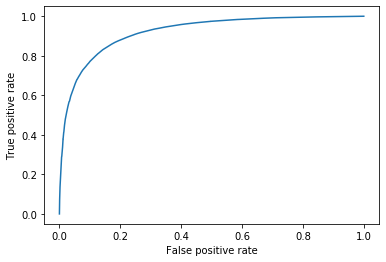

In [25]:
evaluate_model(load_dataset(join(output_root, "shingles_train.csv"), first_col=1), 
               load_targets(train_set_path), 
               RandomForestClassifier())

#### MBTR (rdkit) 

depth [40, 38, 38, 35, 37, 38, 41, 43, 40, 44, 34, 51, 34, 38, 44, 46, 41, 38, 37, 33, 40, 37, 37, 43, 43, 41, 38, 40, 41, 40, 43, 48, 39, 41, 38, 46, 42, 43, 50, 37, 42, 41, 41, 50, 44, 37, 35, 42, 41, 39, 41, 42, 48, 37, 43, 53, 41, 39, 39, 41, 37, 40, 46, 40, 41, 42, 37, 40, 41, 37, 39, 40, 34, 43, 41, 37, 39, 42, 54, 45, 47, 35, 40, 40, 43, 37, 41, 40, 38, 41, 40, 36, 38, 42, 36, 40, 41, 37, 46, 41] 40.67
0.8736879095729653


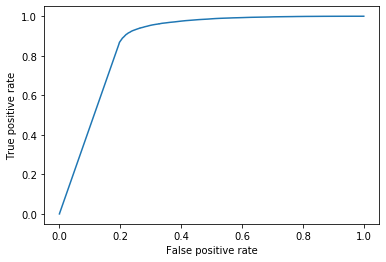

In [26]:
evaluate_model(load_dataset(join(output_root, "mbtr_rdkit_train.csv"), first_col=1), 
               load_targets(train_set_path), 
               RandomForestClassifier())

#### MBTR (rdkit 1000) 

depth [32, 40, 38, 37, 38, 45, 36, 39, 42, 41, 36, 38, 40, 40, 42, 38, 43, 42, 38, 35, 38, 40, 45, 46, 36, 43, 37, 40, 46, 41, 38, 35, 43, 46, 37, 53, 41, 36, 39, 37, 38, 40, 39, 41, 40, 49, 38, 41, 34, 39, 41, 40, 43, 41, 51, 41, 40, 42, 35, 38, 49, 44, 39, 35, 36, 49, 40, 48, 36, 45, 42, 36, 40, 36, 43, 39, 40, 41, 44, 42, 38, 39, 37, 39, 41, 36, 38, 40, 58, 42, 35, 43, 38, 38, 41, 39, 37, 45, 36, 42] 40.34
0.874508094366687


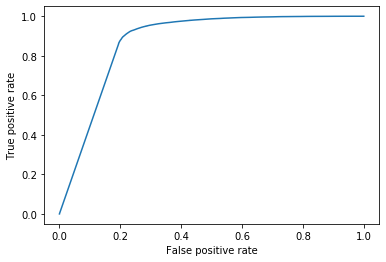

In [27]:
evaluate_model(load_dataset(join(output_root, "mbtr_rdkit_1000_train.csv"), first_col=1), 
               load_targets(train_set_path), 
               RandomForestClassifier())

#### MBTR (obabel)

depth [42, 44, 45, 41, 45, 41, 40, 38, 36, 39, 42, 34, 48, 36, 50, 44, 48, 51, 36, 37, 39, 38, 36, 46, 38, 44, 47, 41, 38, 44, 37, 34, 35, 43, 41, 38, 51, 34, 38, 45, 41, 50, 40, 40, 38, 45, 40, 42, 42, 46, 46, 39, 40, 38, 36, 45, 37, 43, 43, 35, 33, 40, 42, 43, 42, 39, 36, 37, 36, 41, 37, 41, 38, 57, 44, 39, 43, 40, 42, 43, 37, 45, 46, 41, 48, 40, 45, 50, 50, 43, 40, 44, 47, 43, 45, 39, 41, 38, 44, 38] 41.47
0.8225195501037911


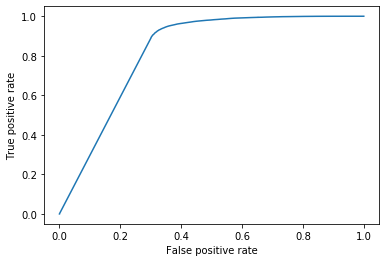

In [28]:
evaluate_model(load_dataset(join(output_root, "mbtr_obabel_train.csv"), first_col=1), 
               load_targets(train_set_path), 
               RandomForestClassifier())

### Sample in test set

In [29]:
test_set_data = load_dataset(test_set_path)

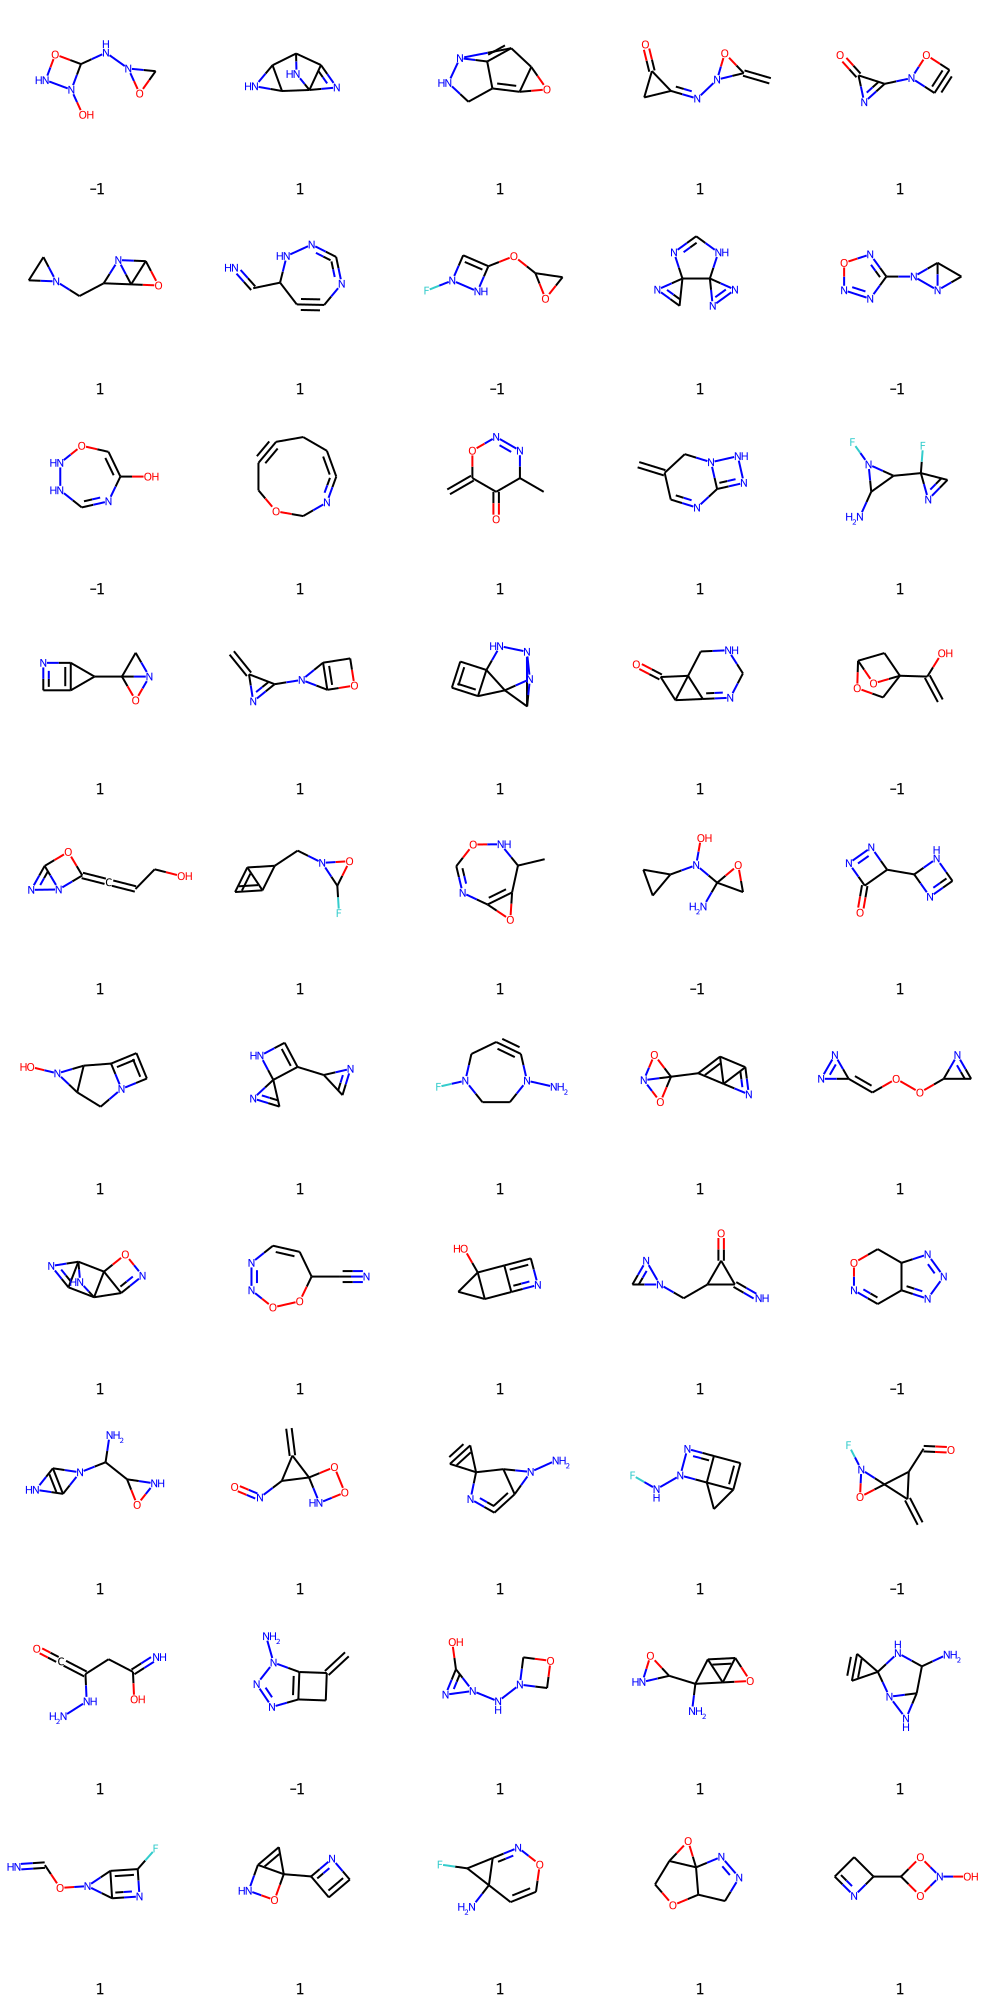

In [30]:
from rdkit.Chem import MolFromSmiles
from rdkit.Chem.Draw import MolsToGridImage

test_smiles = [row[1] for i, row in enumerate(test_set_data) if i>0]
targets = [row[2] for i, row in enumerate(test_set_data) if i>0]
mol_list = []
legends_list = []
for i, smi in enumerate(test_smiles[:50]):
    mol_list.append(MolFromSmiles(smi))
    legends_list.append(str(targets[i]))
    
MolsToGridImage(mol_list, molsPerRow=5, legends=legends_list)

### GridSearchCV

In [25]:
from sklearn.model_selection import GridSearchCV, cross_validate

def train_model_gridsearch(X_train, y_train):
    
    
    grid = {"max_depth": [10, 30, 50, 70, 90, 110, 130, 150, 170, 190]}
    
    # Declaring grid search object (internal CV)
    grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, 
                               scoring="roc_auc", n_jobs=int(n_jobs),
                               cv=CV_INTERNAL, verbose=3, refit="roc_auc")

    # Performing cross validation (external CV)
    scores = cross_validate(estimator=grid_search, X=X_train, y=y_train, scoring="roc_auc",
                            cv=CV_EXTERNAL, n_jobs=1, verbose=3, return_estimator=True)

    return scores

In [26]:
# scores = train_model_gridsearch(load_dataset(join(output_root, "shingles_train.csv"), first_col=1), 
#                                 load_targets(train_set_path))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed: 18.4min
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed: 38.3min finished


[CV] .................................... , score=0.923, total=41.0min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 41.0min remaining:    0.0s


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed: 17.9min
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed: 37.6min finished


[CV] .................................... , score=0.926, total=40.2min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 81.1min remaining:    0.0s


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed: 17.6min
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed: 37.2min finished


[CV] .................................... , score=0.924, total=39.8min
[CV]  ................................................................
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed: 17.8min
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed: 38.4min finished


[CV] .................................... , score=0.924, total=41.0min
[CV]  ................................................................
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed: 18.0min
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed: 37.7min finished


[CV] .................................... , score=0.924, total=40.3min
[CV]  ................................................................
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed: 17.8min
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed: 37.5min finished


[CV] .................................... , score=0.921, total=40.1min
[CV]  ................................................................
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed: 17.9min
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed: 37.6min finished


[CV] .................................... , score=0.922, total=40.2min
[CV]  ................................................................
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed: 17.8min
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed: 37.4min finished


[CV] .................................... , score=0.922, total=40.0min
[CV]  ................................................................
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed: 17.9min
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed: 37.5min finished


[CV] .................................... , score=0.926, total=40.2min
[CV]  ................................................................
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed: 17.8min
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed: 37.5min finished


[CV] .................................... , score=0.923, total=40.1min


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 402.9min finished


In [27]:
scores

{'fit_time': array([2457.07924986, 2409.18329906, 2388.30723691, 2460.77466536,
        2417.8659184 , 2404.98069191, 2413.24482536, 2397.81014371,
        2409.86970162, 2404.40944839]),
 'score_time': array([1.31580544, 1.21006989, 1.23460197, 1.23291492, 1.24548578,
        1.23654461, 1.23571205, 1.21719599, 1.24133062, 1.25765562]),
 'estimator': (GridSearchCV(cv=5, error_score=nan,
               estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                class_weight=None,
                                                criterion='gini', max_depth=None,
                                                max_features='auto',
                                                max_leaf_nodes=None,
                                                max_samples=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                             

In [28]:
for estimator in scores["estimator"]:
    print(estimator.best_params_)

{'max_depth': 170}
{'max_depth': 90}
{'max_depth': 90}
{'max_depth': 90}
{'max_depth': 110}
{'max_depth': 170}
{'max_depth': 90}
{'max_depth': 90}
{'max_depth': 190}
{'max_depth': 150}


In [31]:
cv_results = []
for estimator in scores["estimator"]:
    cv_results.append(estimator.cv_results_["mean_test_score"])

In [34]:
np.mean(np.array(cv_results), axis=0)

array([0.84608489, 0.89916598, 0.91782154, 0.9212391 , 0.92151738,
       0.92133667, 0.92126199, 0.92117012, 0.92129205, 0.9212263 ])

#### Saving CV + GridSearchCV results

In [40]:
from sklearn.externals import joblib
joblib.dump(scores, join(output_exp_root, "CV_gridsearchCV_results.pkl"))

['/home/jleguy/Documents/these/prod/data/08_XAI/01.01_stability_learning/CV_gridsearchCV_results.pkl']

### Train best model on train data

Best model : Random forest max depth = 90

In [62]:
model = RandomForestClassifier(max_depth=90)
model.fit(load_dataset(join(output_root, "shingles_train.csv"), first_col=1), 
          load_targets(train_set_path))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=90, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

0.999716654207846


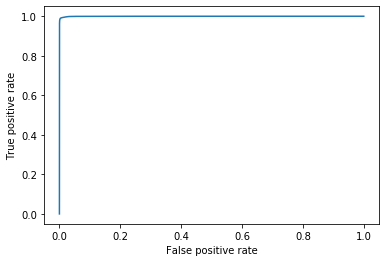

In [63]:
roc_model(load_dataset(join(output_root, "shingles_train.csv"), first_col=1),
          load_targets(train_set_path), model)

0.924656369610684


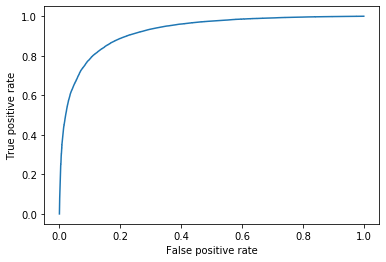

In [64]:
roc_model(load_dataset(join(output_root, "shingles_test.csv"), first_col=1),
          load_targets(test_set_path), model)

In [65]:
joblib.dump(model, join(output_exp_root, "model.pkl"))

['/home/jleguy/Documents/these/prod/data/08_XAI/01.01_stability_learning/model.pkl']